In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap

In [61]:
X,y = make_moons(n_samples=500, noise=0.4)

In [62]:
X[:5]

array([[ 0.03404941, -0.01272792],
       [ 1.53170532,  0.00762381],
       [ 0.01878169,  1.34645809],
       [ 1.56423219, -0.17448269],
       [ 2.94133588,  0.82204996]])

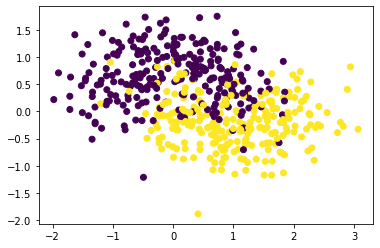

In [63]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [64]:
def plot_boundary(predict):
    x1 = np.arange(min(X[:, 0]) - 1, max(X[:, 0]) + 1, step=0.01)
    x2 = np.arange(min(X[:, 1]) - 1, max(X[:, 1]) + 1, step=0.01)
    
    xx, yy = np.meshgrid(x1, x2)
    arr = np.array([xx.flatten(), yy.flatten()]).T
    z = predict(arr)
    z = z.reshape(xx.shape)
    
    plt.contourf(xx, yy, z, cmap = ListedColormap(('gray', 'red')))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

In [65]:
logistic = LogisticRegression()
logistic.fit(X,y)

LogisticRegression()

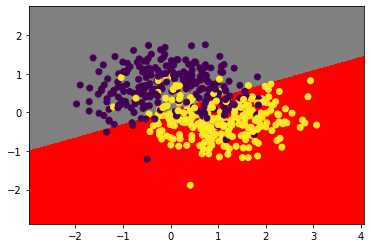

In [66]:
plot_boundary(lambda x : logistic.predict(x))

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
y_pred = logistic.predict(X)
accuracy_score(y, y_pred)

0.842

In [69]:
svm = SVC()
svm.fit(X, y)

SVC()

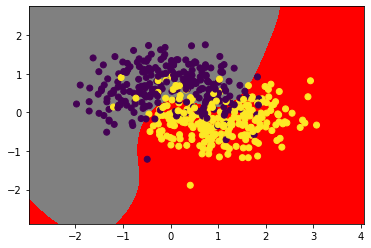

In [70]:
plot_boundary(lambda x : svm.predict(x))

In [71]:
y_pred = svm.predict(X)
accuracy_score(y, y_pred)

0.868

In [72]:
def buildModel(inputNeurons, hiddenNeurons, outputNeurons, epochs, alpha):
    weightsHidden = np.random.uniform(size=(inputNeurons, hiddenNeurons))
    biasHidden = np.random.uniform(size=(1, hiddenNeurons))
    weightsOutput = np.random.uniform(size=(hiddenNeurons, outputNeurons))
    biasOutput = np.random.uniform(size=(1, outputNeurons))
    
    n = len(X)
    
    model = {}
    
    for i in range(epochs):
        fx = np.dot(X, weightsHidden) + biasHidden
        hiddenLayer = np.tanh(fx)
        fx1 = np.dot(hiddenLayer, weightsOutput) + biasOutput
        exp_score = np.exp(fx1)
        prob = exp_score / np.sum(exp_score, axis=1, keepdims=True)
        
        delta = prob
        delta[range(n), y] -= 1
        
        errorHidden = delta.dot(weightsOutput.T)
        slopeHidden = 1 - np.power(hiddenLayer, 2)
        deltaHidden = errorHidden * slopeHidden
        
        weightsOutput = weightsOutput - hiddenLayer.T.dot(delta) * alpha
        weightsHidden = weightsHidden - X.T.dot(deltaHidden) * alpha
        biasOutput = biasOutput - np.sum(delta) * alpha
        biasHidden = biasHidden - np.sum(deltaHidden) * alpha
        
        model = {'wh' : weightsHidden, 'wout' : weightsOutput, 'bh' : biasHidden, 'bout' : biasOutput}
    
    return model

In [73]:
def predict(model, x):
    weightsHidden = model['wh']
    biasHidden = model['bh']
    weightsOutput = model['wout']
    biasOutput = model['bout']
    
    fx = np.dot(x, weightsHidden) + biasHidden
    hiddenLayer = np.tanh(fx)
    fx1 = np.dot(hiddenLayer, weightsOutput) + biasOutput
    exp_score = np.exp(fx1)
    prob = exp_score / np.sum(exp_score, axis=1, keepdims=True)
    
    return np.argmax(prob, axis=1)

In [78]:
hiddenNeuron = 6
inputNeurons = 2
outputNeurons = 2
epochs = 1000
alpha = 0.01
model = buildModel(inputNeurons, hiddenNeuron, outputNeurons, epochs, alpha)

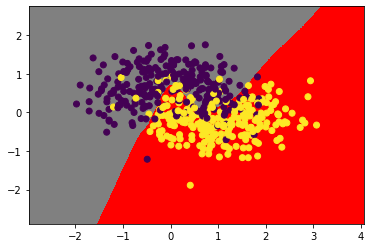

In [79]:
plot_boundary(lambda x : predict(model, x))